<a href="https://colab.research.google.com/github/suwannee-mauy/DADS6003_week03/blob/main/assigment2_SGD_MiniBatch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stochastic GD
## Your turn :)

In [ ]:
import pandas as pd
import numpy as np

x = np.array([[0,1],[2,6],[3,8]]) #x1, x2
y = np.array([1,1,4])

x_b = np.c_[np.ones((x.shape[0],1)),x]
x_b

array([[1., 0., 1.],
       [1., 2., 6.],
       [1., 3., 8.]])

In [ ]:
def cost_function_SGD(theta, x, y, N):
    mrg_xy = np.c_[x, y] # merge x(with bias) and y
    RanN = np.random.randint(0, mrg_xy.shape[1]-1) # random integer
    y_hat = theta[0] * mrg_xy[RanN][0] + theta[1] * mrg_xy[RanN][1] + theta[2] * mrg_xy[RanN][2]
    diff = y_hat - mrg_xy[RanN][3]
    c = (diff)**2

    return c

In [ ]:
def stochastic_gradient_descent(alpha, lamda_ , x, y, ep=0.000000000001, max_iter=10000):
    converged = False
    iter = 0
    N = x.shape[0] # N = row
    t = 1

    # initial theta
    theta = np.random.random((x.shape[1],1))
    print(f"Initial theta: {theta}")

    # total error, J(theta)
    J = cost_function_SGD(theta, x, y, N)
    print("First J:", J)

    # Iterate Loop
    while not converged:
        mrg_xy = np.c_[x, y] # rebuild
        RanN = np.random.randint(0, mrg_xy.shape[1]-1) # random integer
        y_hat = theta[0] * mrg_xy[RanN][0] + theta[1] * mrg_xy[RanN][1] + theta[2] * mrg_xy[RanN][2]
        diff = y_hat - mrg_xy[RanN][3]
        stoch = (x[RanN] * diff).reshape(-1,1) # x_ij * diff

        alpha_t = alpha / (1+(alpha*lamda_*t)) #alpha t +1

        theta = theta - alpha_t * (stoch) # update theta

        assert theta.shape == (x.shape[1],1) #This line makes sure that the shape of theta is still be the same.

        # error
        J2 = cost_function_SGD(theta, x, y, N) # use updated theta

        if abs(J-J2) <= ep:
            print("       Converged, iterations: ", iter, "/", max_iter)
            converged = True

        J = J2   # update error s
        iter += 1  # update iter
        t += 1

        if iter == max_iter:
            print('       Max iterations exceeded!')
            converged = True

    #print("End converged iter = ",iter)
    return theta

Initial theta: [[0.55989876]
 [0.16512319]
 [0.27245369]]
First J: [0.58538134]
       Max iterations exceeded!
Theta =  [[ 1.19171081]
 [ 2.23564961]
 [-0.5794137 ]]
y predict =  [[ 1.19171081]
 [ 2.84794672]
 [ 4.50418263]
 [ 6.16041854]
 [ 7.81665445]
 [ 9.47289035]
 [11.12912626]
 [12.78536217]
 [14.44159808]
 [16.09783399]
 [17.7540699 ]
 [19.41030581]
 [21.06654171]
 [22.72277762]
 [24.37901353]
 [26.03524944]
 [27.69148535]
 [29.34772126]
 [31.00395717]
 [32.66019308]]


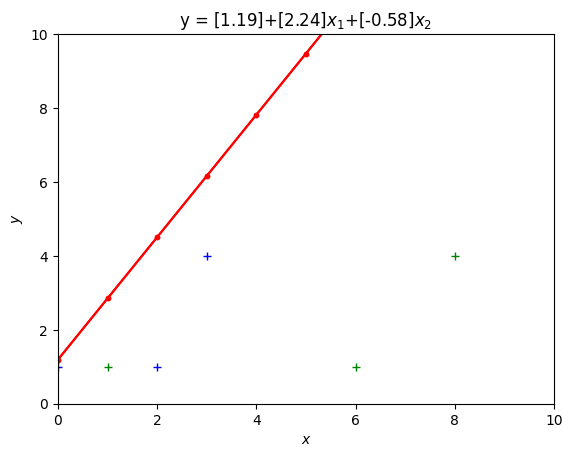

In [ ]:
if __name__ == '__main__':

    alpha = 0.01 # learning rate
    lambda_ = 0.1

    #Training process
    theta = stochastic_gradient_descent(alpha, lambda_, x_b, y, ep=0.00000000000001, max_iter=100000)
    print ("Theta = ", theta)

    #predict trainned x
    xtest = np.array([[i,j] for i,j in zip(range(20), range(20))])
    xtest_b = np.c_[np.ones((xtest.shape[0],1)),xtest]
    y_p = xtest_b.dot(theta)
    print("y predict = ",y_p)

    import matplotlib.pyplot as plt
    plt.title("y = "+str(np.round(theta[0],2))+"+"+str(np.round(theta[1],2))+r"$x_1$"+"+"+str(np.round(theta[2],2))+r"$x_2$")
    plt.plot(xtest, y_p,"r.-")
    plt.plot(x[:,0], y, "b+")
    plt.plot(x[:,1], y, "g+")


    plt.axis([0,10,0,10])
    plt.xlabel(r'$x$')

    plt.ylabel(r'$y$')
    plt.show()


# Mini-batch GD  (shuffle แล้วเรียกเรียง เช่น 1-10)
## Your turn :)

In [ ]:
def cost_function_miniBGD(theta, x, y, N):
    mrg_xy = np.c_[x, y]
    np.random.shuffle(mrg_xy)
    mrg_xy = mrg_xy[:N]

    c = 1/(2*N) * sum([(theta[0] + theta[1]*mrg_xy[i][1]+ theta[2]*mrg_xy[i][2] - mrg_xy[i][3])**2 for i in range(N)])

    x = mrg_xy[:,:-1].reshape(-1, x.shape[1])
    y = mrg_xy[:,-1].reshape(-1,1)
    y_hat = x.dot(theta)
    diff = y_hat - y
    grad = x.T.dot(diff)

    return c, grad


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
def mini_batch_gradient_descent(alpha, x, y, N,ep=0.001, max_iter=10000):
  converged = False
  iter = 0

  # initial theta
  theta =  np.random.random((x.shape[1],1))
  print("Init theta.shape = ",theta.shape)

  # total error, J(theta)
  J,grad = cost_function_miniBGD(theta, x, y, N)

  # Iterate Loop
  while not converged:

    theta = theta - alpha * (1/N) * (grad)
    # print(theta.shape)
    assert theta.shape == (x.shape[1],1) #This line makes sure that the shape of theta is still be the same.

    # error
    J2,grad = cost_function_miniBGD(theta, x, y, N)

    if abs(J-J2) <= ep:
        print("       Converged, iterations: ", iter, "/", max_iter)
        converged = True

    J = J2   # update error s
    iter += 1  # update iter

    if iter == max_iter:
        print('       Max iterations exceeded!')
        converged = True

  #print("End converged iter = ",iter)
  return theta

Init theta.shape =  (3, 1)
       Max iterations exceeded!
Theta =  [[0.43366593]
 [0.19745277]
 [0.28101583]]
y predict =  [[0.43366593]
 [0.91213453]
 [1.39060314]
 [1.86907174]
 [2.34754034]
 [2.82600895]
 [3.30447755]
 [3.78294615]
 [4.26141476]
 [4.73988336]
 [5.21835196]
 [5.69682057]
 [6.17528917]
 [6.65375777]
 [7.13222638]
 [7.61069498]
 [8.08916359]
 [8.56763219]
 [9.04610079]
 [9.5245694 ]]


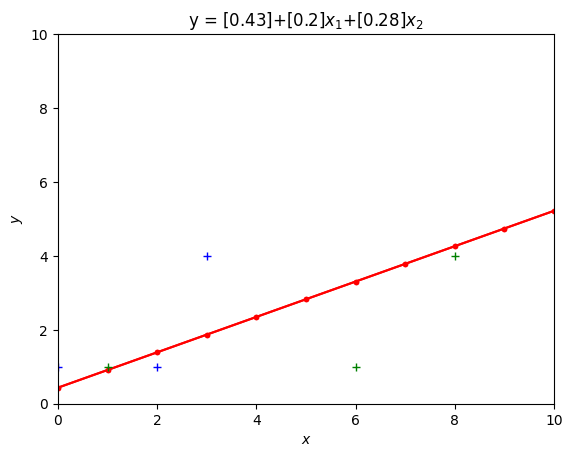

In [ ]:
if __name__ == '__main__':
    alpha = 0.01 # learning rate
    N = 2
    theta = np.random.random((x.shape[1], 1))

    #Training process
    theta = mini_batch_gradient_descent(alpha, x_b, y, N, ep=0.00000000000001, max_iter=100)
    print ("Theta = ", theta)

    #predict trainned x
    xtest = np.array([[i,j] for i,j in zip(range(20), range(20))])
    xtest_b = np.c_[np.ones((xtest.shape[0],1)),xtest]
    y_p = xtest_b.dot(theta)
    print("y predict = ",y_p)

    import matplotlib.pyplot as plt
    plt.title("y = "+str(np.round(theta[0],2))+"+"+str(np.round(theta[1],2))+r"$x_1$"+"+"+str(np.round(theta[2],2))+r"$x_2$")
    plt.plot(xtest, y_p,"r.-")
    plt.plot(x[:,0], y, "b+")
    plt.plot(x[:,1], y, "g+")

    plt.axis([0,10,0,10])
    plt.xlabel(r'$x$')

    plt.ylabel(r'$y$')
    plt.show()